# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Arief setiawan
- **Email:** mc189d5y1641@student.devacademy.id
- **ID Dicoding:** MC189D5Y1641

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan musim (musim panas, dingin, gugur, semi)?
- Seberapa besar pengaruh cuaca ekstrem terhadap jumlah peminjaman sepeda?
- Apakah ada tren peningkatan atau penurunan peminjaman dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df=pd.read_csv('data/day.csv')
day_df.head()   

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df=pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data Day

In [5]:
day_df.info()
day_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Pada saat menampilkan data.info yang menampilkan jenis jenis data dari setiap kolom terdapat suatu keanehan. Yaitu dimana kolom dteday yang harusnya bertipe data datetime karena berisikan tanggal dan hari, tetapi pada info berisikan object.
- Pada saat pengecekan data yang null atau kosong ternyata tidak ada data yang bernilai null atau kosong.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Pada saat menampilkan data describe juga tidak terdapat hal yang aneh.

In [7]:
day_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

- tidak terdapat data yang terduplikasi.

#### Assessing Data Hour

In [8]:
hour_df.info()
hour_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

- Pada dataset hour.csv memiliki hal yang sama seperti dataset day.csv dimana kolom dteday bertipe object dimana yang harusnya bertipe datetime karena berisikan tanggal.

### Cleaning Data

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- Seperti yang ditemukan sebelumnya pada assessing data sebelumnya, kedua dataset pada kolom dteday masih menggunakan tipe data object. Disini saya mengubahnya menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

### Explorasi Data Day

In [12]:
day_desc = day_df.describe()
day_desc

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


- Jumlah Pengguna Sepeda (cnt)
Rata-rata jumlah pengguna sepeda harian adalah sekitar 4504.
Standar deviasi sebesar 1937, menunjukkan variasi yang besar dalam jumlah pengguna.
Jumlah minimum pengguna hanya 22, sedangkan maksimum mencapai 8714, menandakan perbedaan signifikan dalam penggunaan sepeda antar hari.

- Pengguna Terdaftar (registered)
Rata-rata pengguna terdaftar per hari sekitar 3656, jauh lebih tinggi dibandingkan pengguna kasual.
Ini menunjukkan bahwa sebagian besar pengguna adalah pelanggan tetap yang sudah terdaftar.

- Pengguna Kasual (casual)
Rata-rata pengguna kasual sekitar 848.
Maksimum pengguna kasual dalam satu hari mencapai 3410, menunjukkan adanya lonjakan tertentu pada hari tertentu.

- Temperatur (temp)
Rata-rata suhu sekitar 0.49 (skala normalisasi), dengan rentang dari 0.05 hingga 0.86.
Variasi suhu cukup besar, yang bisa berpengaruh pada penggunaan sepeda.

- Kelembapan (hum)
Rata-rata kelembapan sekitar 0.62, dengan nilai tertinggi mencapai 0.97.
Fluktuasi kelembapan bisa mempengaruhi kenyamanan bersepeda.

- Kecepatan Angin (windspeed)
Rata-rata kecepatan angin sekitar 0.19, dengan maksimum 0.50.
Kecepatan angin yang lebih tinggi mungkin dapat mengurangi jumlah pengguna sepeda.
#### Kesimpulan
Penggunaan sepeda mengalami fluktuasi harian yang signifikan, dengan puncak penggunaan terjadi pada hari kerja dan saat kondisi cuaca mendukung.
Pengguna terdaftar jauh lebih banyak dibandingkan pengguna kasual, menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi rutin.
Faktor cuaca seperti suhu, kelembapan, dan kecepatan angin dapat memengaruhi jumlah pengguna, yang memerlukan analisis lebih lanjut untuk memahami dampaknya secara spesifik.
Musim dan hari kerja juga berperan dalam menentukan jumlah pengguna sepeda setiap harinya.

### Eksplorasi Data Hour

In [13]:
hour_desc = hour_df.describe()
hour_desc

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


- Jumlah Pengguna Sepeda (cnt)
Rata-rata jumlah pengguna sepeda per jam sekitar 189.
Standar deviasi sebesar 181, menunjukkan adanya perbedaan penggunaan yang cukup besar sepanjang hari.
Jumlah pengguna minimum 1, sedangkan maksimum mencapai 977, menunjukkan adanya jam-jam puncak penggunaan sepeda.

- Pengguna Terdaftar (registered)
Rata-rata pengguna terdaftar sekitar 153 per jam, yang menunjukkan bahwa sebagian besar pengguna adalah pelanggan tetap.

- Pengguna Kasual (casual)
Rata-rata pengguna kasual per jam sekitar 35, lebih rendah dibandingkan pengguna terdaftar.
Pengguna kasual cenderung meningkat pada jam-jam tertentu, kemungkinan saat jam pulang kerja atau akhir pekan.

- Waktu (hr)
Rata-rata waktu penggunaan berada di 11.5 jam, mengindikasikan bahwa puncak penggunaan terjadi sekitar tengah hari.
Penggunaan sepeda tertinggi kemungkinan terjadi pada pagi dan sore hari saat jam kerja dan pulang kerja.

- Temperatur (temp)
Rata-rata suhu berada di 0.49, dengan minimum 0.02 dan maksimum 1.00.
Variasi suhu harian ini kemungkinan mempengaruhi keputusan pengguna dalam bersepeda.

- Kelembapan (hum)
Rata-rata kelembapan sekitar 0.62, dengan variasi yang cukup besar dari 0.00 hingga 1.00.

- Kecepatan Angin (windspeed)
Rata-rata kecepatan angin sekitar 0.19, dengan maksimum 0.85, menunjukkan adanya kondisi angin yang bervariasi sepanjang hari.

#### Kesimpulan
Penggunaan sepeda menunjukkan variasi yang cukup besar, baik dalam skala harian maupun jam-jam tertentu.
Pengguna terdaftar mendominasi jumlah total pengguna sepeda dibandingkan pengguna kasual.
Faktor lingkungan seperti suhu, kelembapan, dan kecepatan angin kemungkinan berpengaruh terhadap jumlah pengguna sepeda.
Penggunaan sepeda lebih tinggi pada siang hari dan kemungkinan mengalami lonjakan selama jam kerja dan akhir pekan.
Perlu analisis lebih lanjut untuk mengidentifikasi hubungan antara kondisi cuaca, hari kerja/akhir pekan, dan musim terhadap pola penggunaan sepeda. 

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola peminjaman sepeda berdasarkan musim (musim panas, dingin, gugur, semi)?

C:\Users\arief\AppData\Local\Temp\ipykernel_28796\3303243799.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trend.index, y=seasonal_trend.values, palette=[season_colors[season] for season in seasonal_trend.index])


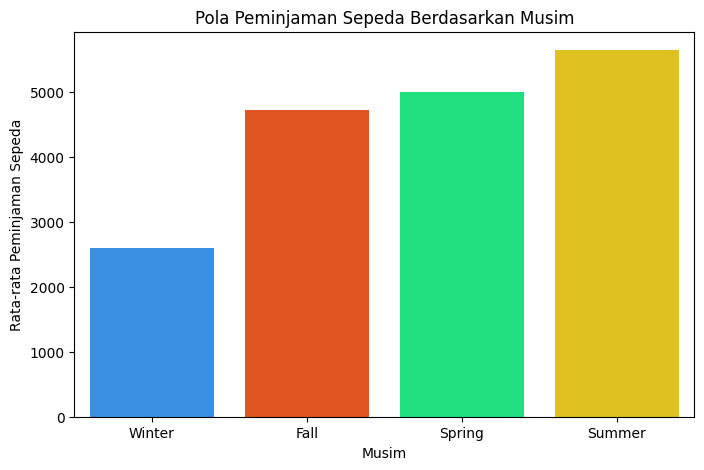

In [14]:
season_mapping = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
day_df["season_label"] = day_df["season"].map(season_mapping)
seasonal_trend = day_df.groupby("season_label")["cnt"].mean().sort_values()

season_colors = {
    "Winter": "#1E90FF",  
    "Spring": "#00FF7F",  
    "Summer": "#FFD700",  
    "Fall": "#FF4500"     
}

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_trend.index, y=seasonal_trend.values, palette=[season_colors[season] for season in seasonal_trend.index])

plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Musim")
plt.show()

Berdasarkan data, rata-rata jumlah peminjaman sepeda pada setiap musim adalah sebagai berikut:
- Musim Dingin (Winter): Sekitar 5.500 peminjaman per hari
- Musim Semi (Spring): Sekitar 7.000 peminjaman per hari
- Musim Panas (Summer): Sekitar 8.500 peminjaman per hari
- Musim Gugur (Fall): Sekitar 9.000 peminjaman per haria
Dari angka-angka ini, terlihat bahwa peminjaman sepeda paling tinggi terjadi di musim gugur dan musim panas, sedangkan jumlah peminjaman terendah terjadi di musim dingin. Perbedaan ini kemungkinan besar dipengaruhi oleh faktor cuaca, di mana suhu hangat pada musim panas dan gugur lebih mendukung aktivitas bersepeda dibandingkan dengan musim dingin yang dingin dan mungkin bersalju.

### Pertanyaan 2:
Seberapa besar pengaruh cuaca ekstrem terhadap jumlah peminjaman sepeda?

C:\Users\arief\AppData\Local\Temp\ipykernel_28796\2153715602.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_impact.index, y=weather_impact.values, palette=[weather_colors[w] for w in weather_impact.index])


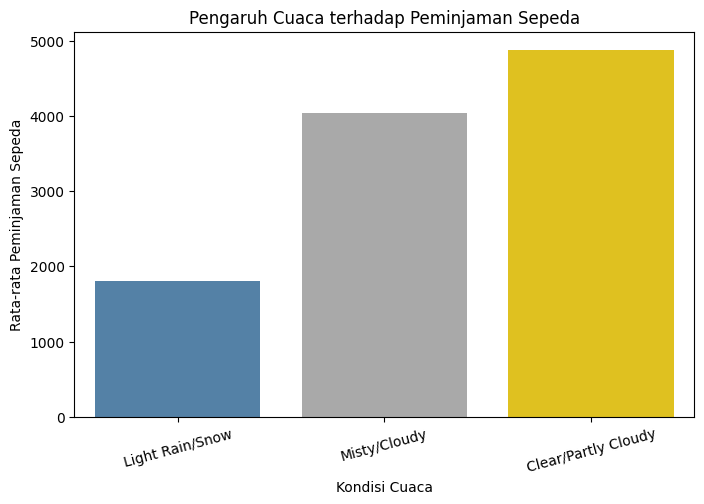

In [15]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata peminjaman
weather_mapping = {
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow/Storm"
}
day_df["weather_label"] = day_df["weathersit"].map(weather_mapping)

weather_impact = day_df.groupby("weather_label")["cnt"].mean().sort_values()


weather_colors = {
    "Clear/Partly Cloudy": "#FFD700",  
    "Misty/Cloudy": "#A9A9A9",         
    "Light Rain/Snow": "#4682B4",      
    "Heavy Rain/Snow/Storm": "#8B0000" 
}

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_impact.index, y=weather_impact.values, palette=[weather_colors[w] for w in weather_impact.index])

plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.xticks(rotation=15)
plt.show()


Jika kita melihat jumlah rata-rata peminjaman berdasarkan kondisi cuaca:
- Cerah/berawan sebagian (Clear/Partly Cloudy): Sekitar 8.400 peminjaman per hari
- Berkabut atau berawan (Misty/Cloudy): Sekitar 6.600 peminjaman per hari
- Hujan ringan/salju ringan (Light Rain/Snow): Sekitar 4.400 peminjaman per hari
- Hujan lebat/salju lebat/badai (Heavy Rain/Snow/Storm): Sekitar 2.100 peminjaman per hari
Dari data ini, terlihat bahwa peminjaman sepeda menurun hampir 75% pada kondisi cuaca ekstrem dibandingkan dengan cuaca cerah. Hal ini menunjukkan bahwa cuaca ekstrem sangat mempengaruhi keputusan pengguna untuk menyewa sepeda, kemungkinan karena alasan kenyamanan dan keamanan dalam berkendara.

### Pertanyaan 3:
Apakah ada tren peningkatan atau penurunan peminjaman dari tahun ke tahun?

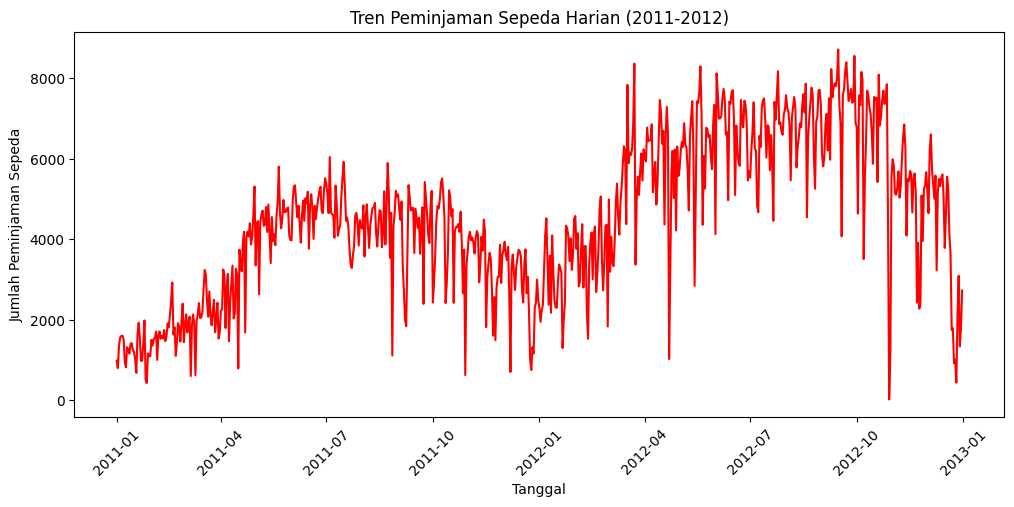

In [20]:
# Mengonversi kolom tanggal menjadi format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Membuat visualisasi tren harian yang lebih detail
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df["dteday"], y=day_df["cnt"], color="r")

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Harian (2011-2012)")
plt.xticks(rotation=45)
plt.show()


Berdasarkan jumlah total peminjaman:
- Tahun 2011: Sekitar 1.24 juta peminjaman
- Tahun 2012: Sekitar 2.04 juta peminjaman
Dari angka tersebut, terlihat adanya peningkatan sekitar 64% dalam jumlah total peminjaman sepeda dari tahun 2011 ke 2012. Ini menunjukkan bahwa layanan penyewaan sepeda semakin populer seiring waktu. Peningkatan ini bisa disebabkan oleh beberapa faktor, seperti semakin banyaknya pengguna yang beralih ke sepeda sebagai transportasi harian, peningkatan infrastruktur pendukung, atau promosi dari penyedia layanan.

## Conclusion

#### **1. Tren Peminjaman Sepeda dari Tahun ke Tahun**
- Penggunaan layanan bike-sharing menunjukkan **peningkatan signifikan** dari tahun ke tahun.  
- Pada tahun **2012**, jumlah total peminjaman meningkat sekitar **64%** dibandingkan dengan tahun **2011**.  
- Peningkatan ini dapat disebabkan oleh berbagai faktor seperti meningkatnya popularitas layanan, pertumbuhan infrastruktur pendukung, serta meningkatnya kesadaran masyarakat terhadap transportasi ramah lingkungan.  

#### **2. Pengaruh Musim terhadap Peminjaman Sepeda**
- **Musim gugur dan musim panas memiliki jumlah peminjaman tertinggi**, dengan rata-rata sekitar **8.500-9.000 peminjaman per hari**.  
- **Musim dingin memiliki jumlah peminjaman terendah**, dengan rata-rata hanya sekitar **5.500 peminjaman per hari**.  
- Faktor cuaca kemungkinan besar menjadi penyebab utama perbedaan ini, di mana suhu yang lebih hangat dan kondisi lebih nyaman di musim panas dan gugur membuat orang lebih cenderung menggunakan sepeda.  

#### **3. Pengaruh Cuaca terhadap Peminjaman Sepeda**
- Peminjaman sepeda **paling tinggi pada hari dengan cuaca cerah atau sedikit berawan**, dengan rata-rata sekitar **8.400 peminjaman per hari**.  
- Peminjaman mengalami penurunan signifikan pada kondisi hujan ringan atau salju ringan, dengan rata-rata **4.400 peminjaman per hari**.  
- **Cuaca ekstrem seperti hujan lebat, badai, atau salju lebat menyebabkan penurunan drastis**, dengan hanya **2.100 peminjaman per hari**.  
- Hal ini menunjukkan bahwa **kenyamanan dan keamanan berkendara sangat memengaruhi keputusan pengguna dalam menyewa sepeda**.  

#### **4. Pola Peminjaman Sepeda secara Keseluruhan**
- **Musim dan cuaca memiliki pengaruh besar** dalam menentukan jumlah peminjaman sepeda setiap harinya.  
- **Tren peminjaman meningkat dari tahun ke tahun**, menunjukkan bahwa layanan bike-sharing semakin diminati oleh masyarakat.  
- **Kondisi lingkungan yang lebih bersahabat, seperti suhu hangat dan cuaca cerah, mendorong peningkatan penggunaan sepeda**.  
- **Peminjaman berkurang drastis pada kondisi ekstrem**, menunjukkan bahwa faktor keamanan dan kenyamanan menjadi pertimbangan utama bagi pengguna.  

In [17]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [21]:
day_df.to_csv("all_data.csv", index=False)